In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [5]:
# Get only the cubes that have our line of interest in them
mol_tag = 45002 # 45504
cubes, tbl = fetch_cubes(cubefns, catalog='JPL', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=1>
  FREQ    ERR    LGINT    DR    ELO    GUP   TAG  QNFMT  QN'   QN" 
  MHz     MHz   MHz nm2        1 / cm                              
float64 float64 float64 int64 float64 int64 int64 int64 int64 int64
------- ------- ------- ----- ------- ----- ----- ----- ----- -----
85759.0     0.2 -2.4965     2  1.4303     5 45002   101     2     1, <Table length=1>
    FREQ      ERR    LGINT    DR    ELO    GUP   TAG  QNFMT  QN'   QN" 
    MHz       MHz   MHz nm2        1 / cm                              
  float64   float64 float64 int64 float64 int64 int64 int64 int64 int64
----------- ------- ------- ----- ------- ----- ----- ----- ----- -----
128636.7064  0.0202 -1.9757     2  4.2909     7 45002   101     3     2, <Table length=1>
    FREQ      ERR    LGINT    DR    ELO    GUP   TAG  QNFMT  QN'   QN" 
    MHz       MHz   MHz nm2        1 / cm                              
  float64   float64 float64 int64 float64 int64 int64 int64 int64 int64
----------- ------- ------- --

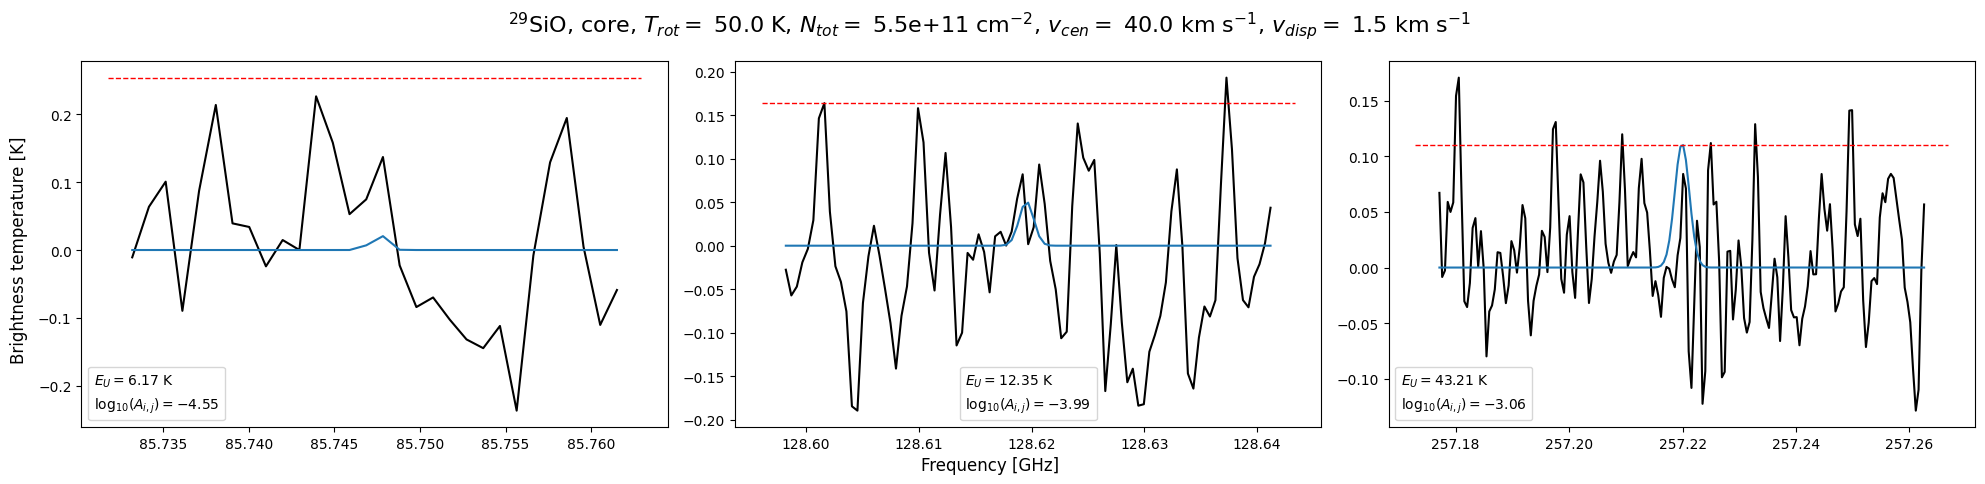

In [7]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 5.5e+11, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=5, 
               nrows=1, ncols=3, parse_loc=False, line_by_line=True, name_for_plot=f'$^{{29}}$SiO', extr_type="coord", crd=crd,
               show_2_sigma=True)

In [8]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

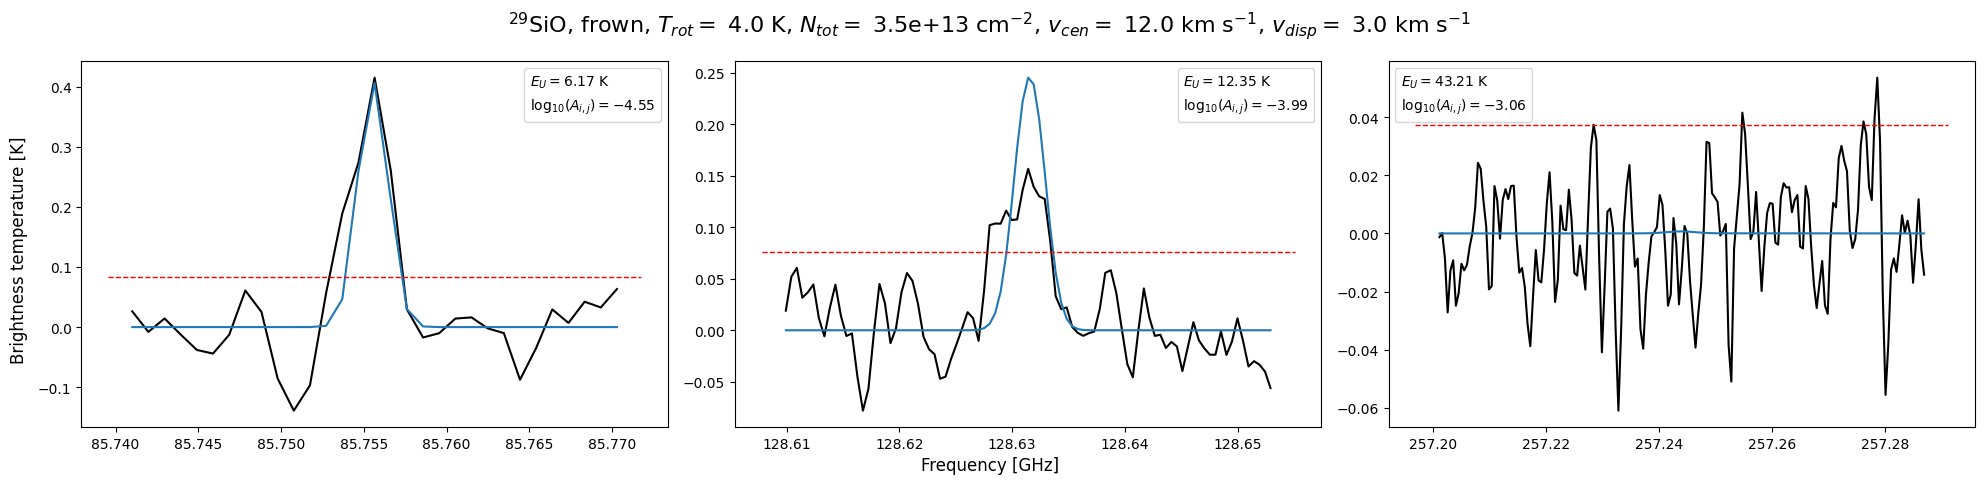

In [24]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 4., N_tot = 3.5e+13, v_cen = 12.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=5, 
                       nrows=1, ncols=3, parse_loc=False, line_by_line=True, name_for_plot=f'$^{{29}}$SiO', extr_type="reg", just_data=False,
                       show_2_sigma=True, return_freqs=True)

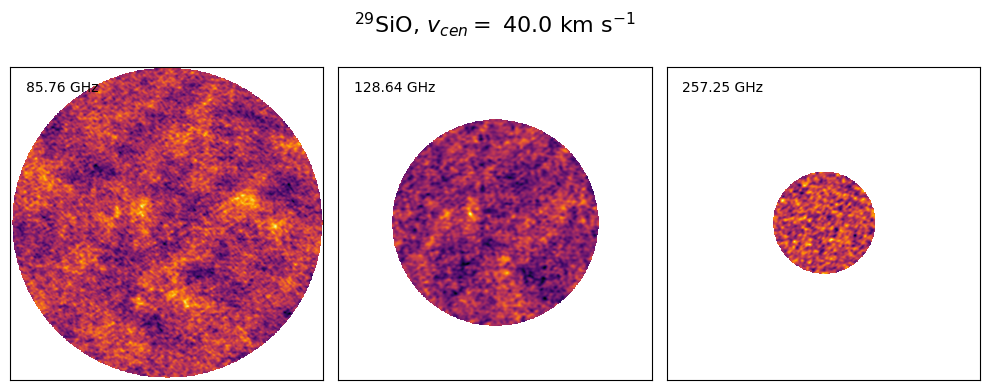

In [10]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40*u.km/u.s, fig_width=10, fig_height=4, nrows=1, ncols=3, name_for_plot=f'$^{{29}}$SiO')

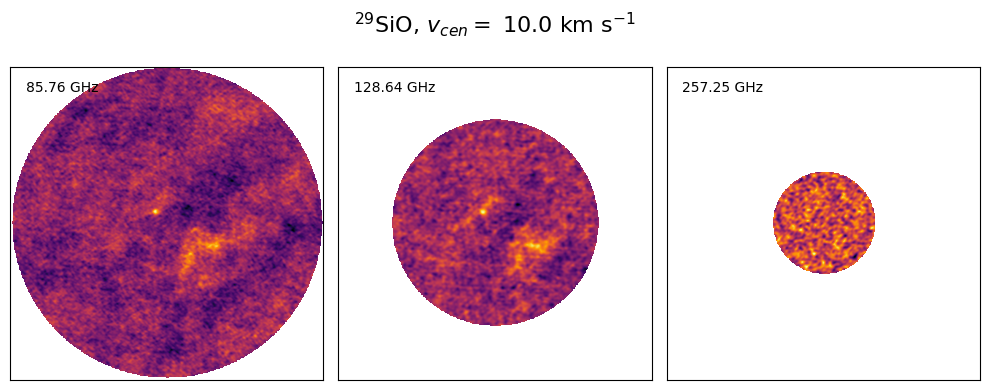

In [11]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=10*u.km/u.s, fig_width=10, fig_height=4, nrows=1, ncols=3, name_for_plot=f'$^{{29}}$SiO')